In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [19]:
dataset_original =  pd.read_csv("./datos/competencia_03.csv.gz")

In [20]:
#dataset = dataset_original.copy()
meses_usar = [201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202012, 202101, 202102, 202103, 202106, 202107]
dataset = dataset_original[dataset_original['foto_mes'].isin(meses_usar)]
#dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
#dataset = dataset_original.copy()

In [21]:
dataset.set_index('foto_mes', inplace=True)

In [22]:
#df_roto_cero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
#df_roto_cero_null = df_roto_cero_null[df_roto_cero_null.columns[df_roto_cero_null.eq(100).any()]].stack().reset_index()
#df_roto_cero_null.columns = ['foto_mes', 'columna', 'porcentagem']
#df_roto_cero_null = df_roto_cero_null[df_roto_cero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [23]:
df_roto_cero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_cero = df_roto_cero_bruto[df_roto_cero_bruto.columns[df_roto_cero_bruto.eq(100).any()]].stack().reset_index()
df_roto_cero.columns = ['foto_mes', 'columna', 'porcentagem']
df_roto_cero = df_roto_cero[df_roto_cero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [24]:
#df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
#df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
#df_roto_null.columns = ['foto_mes', 'columna', 'porcentagem']
#df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [25]:
#count_df_roto_cero_null = df_roto_cero_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero_null, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores Nulos ou cero por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(count_df_roto_cero_null['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_17280\979044820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')


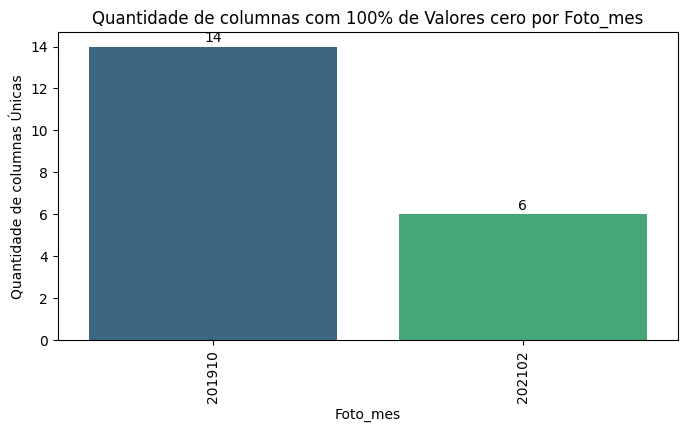

In [26]:
count_df_roto_cero = df_roto_cero.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores cero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_cero['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [27]:
#count_df_roto_null = df_roto_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_null, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores nulos por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(count_df_roto_null['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

In [28]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

#merged_df = pd.merge(count_df_roto_cero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_cero', '_null'))
#merged_df = merged_df.fillna(0)
#merged_df['quantidade_columnas'] =  merged_df['quantidade_columnas_cero'] - merged_df['quantidade_columnas_null']

In [29]:

#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=merged_df, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores nulos e zerados por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(merged_df['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

In [30]:
columnas_imputar = df_roto_cero['columna'].unique()

In [31]:
dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)

C:\Users\maico\AppData\Local\Temp\ipykernel_17280\2732953549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)


In [32]:
dataset[columnas_imputar].isna().sum()   

mrentabilidad                   141373
chomebanking_transacciones      616341
mcomisiones_otras               189368
ccomisiones_otras               189290
mtarjeta_master_descuentos     2032271
mtarjeta_visa_descuentos       1971663
ctarjeta_visa_descuentos       1912836
ctarjeta_master_descuentos     1996991
ccajeros_propios_descuentos    1980794
mpasivos_margen                 159825
mactivos_margen                 221258
mcomisiones                     189578
mrentabilidad_annual            140668
mcajeros_propios_descuentos    1995490
dtype: int64

In [33]:
dataset_imputar = dataset.copy()

In [34]:
dataset_imputar[columnas_imputar].isna().sum()

mrentabilidad                   141373
chomebanking_transacciones      616341
mcomisiones_otras               189368
ccomisiones_otras               189290
mtarjeta_master_descuentos     2032271
mtarjeta_visa_descuentos       1971663
ctarjeta_visa_descuentos       1912836
ctarjeta_master_descuentos     1996991
ccajeros_propios_descuentos    1980794
mpasivos_margen                 159825
mactivos_margen                 221258
mcomisiones                     189578
mrentabilidad_annual            140668
mcajeros_propios_descuentos    1995490
dtype: int64

In [35]:
dataset_imputar[columnas_imputar] = dataset_imputar[columnas_imputar].replace(0, np.nan)

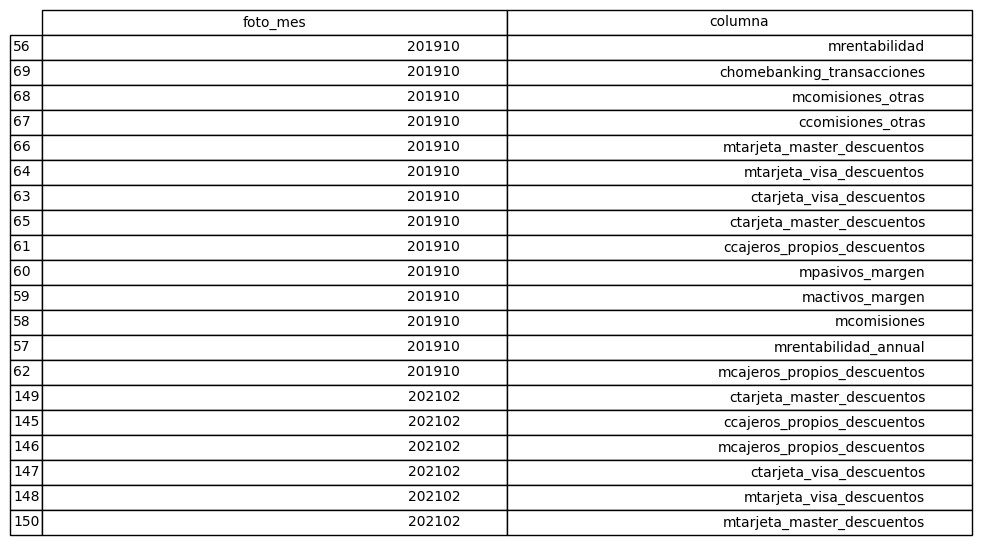

In [36]:
df_selecionado = df_roto_cero.drop(columns='porcentagem')
df_selecionado = df_selecionado.rename(columns={'columna': 'columna'})

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_selecionado, loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  # Ajusta a escala da tabela

plt.savefig('tabela_exportada.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

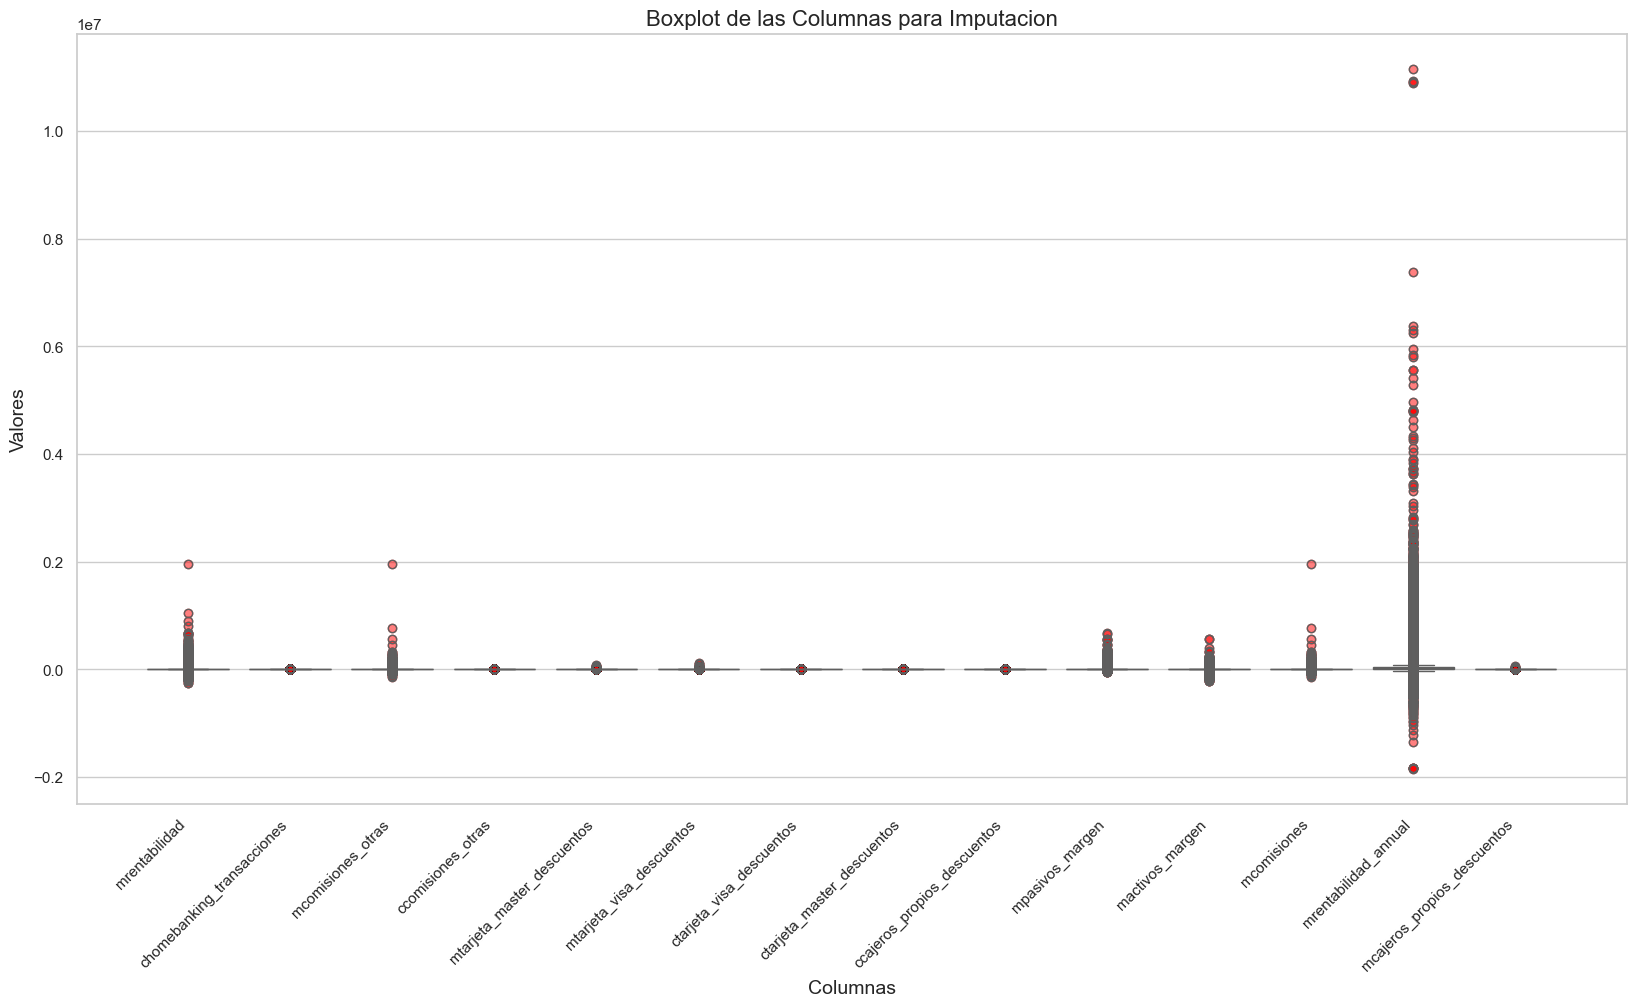

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=dataset_imputar[columnas_imputar], palette="Set3")

for i in range(len(columnas_imputar)):
    y = dataset_imputar[columnas_imputar[i]]
    x = [i] * len(y)
    ax.scatter(x, y, alpha=0.5, color='red')

plt.title("Boxplot de las Columnas para Imputacion", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Valores", fontsize=14)

plt.xticks(range(len(columnas_imputar)), columnas_imputar, rotation=45, ha='right')

plt.show()

In [41]:
#dataset_imputar[columnas_imputar].mean()
dataset_imputar.sort_values(by=['numero_de_cliente', 'foto_mes'], inplace=True)

dataset_inputado_media_cliente = dataset_imputar.copy()
dataset_inputado_mediana_cliente = dataset_imputar.copy()

#dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.mean()))
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.median()))


In [42]:
dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).mean()))

In [43]:
dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).median()))

C:\Users\maico\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\maico\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [44]:
dataset_inputado_media_cliente[columnas_imputar] = dataset_inputado_media_cliente[columnas_imputar].fillna(0)
dataset_inputado_mediana_cliente[columnas_imputar] = dataset_inputado_mediana_cliente[columnas_imputar].fillna(0)

In [45]:
dataset[columnas_imputar].describe()

,mrentabilidad,chomebanking_transacciones,mcomisiones_otras,ccomisiones_otras,mtarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccajeros_propios_descuentos,mpasivos_margen,mactivos_margen,mcomisiones,mrentabilidad_annual,mcajeros_propios_descuentos
count,1922058.000,1447090.000,1874063.000,1874141.000,31160.000,91768.000,150595.000,66440.000,82637.000,1903606.000,1842173.000,1873853.000,1922763.000,67941.000
mean,2579.594,50.735,1390.340,9.375,1113.071,1150.524,1.630,1.557,1.888,1895.700,-864.787,1384.138,29440.983,594.372
std,7602.242,75.777,3305.263,7.417,2114.213,2096.230,1.366,1.268,1.911,4797.931,3754.241,3288.234,65328.972,853.603
min,-254002.530,1.000,-137675.840,1.000,0.170,0.170,1.000,1.000,1.000,-50233.130,-224802.930,-137675.840,-1846421.630,-246.330
25%,251.650,6.000,291.330,6.000,205.860,214.480,1.000,1.000,1.000,312.100,-1525.590,290.500,6416.200,140.580
50%,1363.270,23.000,820.630,8.000,505.375,517.290,1.000,1.000,1.000,818.030,-469.670,817.900,16853.180,343.100
75%,3091.910,69.000,1695.120,12.000,1110.785,1288.815,2.000,2.000,2.000,1876.760,7.080,1690.890,34029.190,757.060
max,1958168.140,10387.000,1959169.310,263.000,71083.800,118224.210,57.000,40.000,44.000,667148.640,568198.100,1959169.310,11161405.720,53538.070


In [46]:
dataset_inputado_media_cliente[columnas_imputar].describe()

,mrentabilidad,chomebanking_transacciones,mcomisiones_otras,ccomisiones_otras,mtarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccajeros_propios_descuentos,mpasivos_margen,mactivos_margen,mcomisiones,mrentabilidad_annual,mcajeros_propios_descuentos
count,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000
mean,2593.006,43.328,1403.088,9.154,77.351,188.866,0.266,0.168,0.164,1881.608,-852.917,1397.011,29343.052,54.514
std,7608.351,70.560,3251.784,7.450,684.331,1119.848,0.710,0.574,0.651,4783.260,3724.867,3235.089,65779.411,345.985
min,-254002.530,0.000,-137675.840,0.000,0.000,0.000,0.000,0.000,0.000,-50233.130,-224802.930,-137675.840,-1846421.630,-246.330
25%,252.420,4.000,288.980,6.000,0.000,0.000,0.000,0.000,0.000,300.640,-1494.995,288.198,6230.520,0.000
50%,1379.150,16.000,832.200,8.000,0.000,0.000,0.000,0.000,0.000,808.100,-430.830,830.900,16790.930,0.000
75%,3126.158,57.000,1730.530,12.000,0.000,0.000,0.000,0.000,0.000,1863.100,4.535,1730.390,34102.010,0.000
max,1958168.140,10387.000,1959169.310,263.000,71083.800,118224.210,57.000,40.000,44.000,667148.640,568198.100,1959169.310,11161405.720,53538.070


In [47]:
dataset_inputado_mediana_cliente[columnas_imputar].describe()

,mrentabilidad,chomebanking_transacciones,mcomisiones_otras,ccomisiones_otras,mtarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccajeros_propios_descuentos,mpasivos_margen,mactivos_margen,mcomisiones,mrentabilidad_annual,mcajeros_propios_descuentos
count,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000,2063431.000
mean,2583.933,42.962,1388.336,9.143,77.272,188.050,0.265,0.167,0.163,1874.785,-847.713,1382.232,29350.689,54.321
std,7588.854,70.482,3220.443,7.454,685.559,1118.242,0.709,0.571,0.651,4787.654,3721.015,3203.776,65882.550,343.226
min,-254002.530,0.000,-137675.840,0.000,0.000,0.000,0.000,0.000,0.000,-50233.130,-224802.930,-137675.840,-1846421.630,-246.330
25%,249.750,4.000,286.240,6.000,0.000,0.000,0.000,0.000,0.000,297.755,-1490.260,285.360,6222.320,0.000
50%,1376.690,16.000,826.440,8.000,0.000,0.000,0.000,0.000,0.000,802.580,-427.340,823.580,16793.470,0.000
75%,3116.075,57.000,1724.810,12.000,0.000,0.000,0.000,0.000,0.000,1853.800,4.810,1720.260,34121.865,0.000
max,1958168.140,10387.000,1959169.310,263.000,71083.800,118224.210,57.000,40.000,44.000,667148.640,568198.100,1959169.310,11161405.720,53538.070


In [48]:
#tabla_resumen_cliente
tabla_resumen_cliente = pd.DataFrame()
tabla_resumen_cliente = pd.DataFrame(dataset[columnas_imputar].mean().round(4))
tabla_resumen_cliente = tabla_resumen_cliente.rename(columns={0: 'Media_Original'})
tabla_resumen_cliente['Media_pos_imputar_media'] = dataset_inputado_media_cliente[columnas_imputar].mean().round(4)
tabla_resumen_cliente['Media_pos_imputar_mediana'] = dataset_inputado_mediana_cliente[columnas_imputar].mean().round(4)
tabla_resumen_cliente['Mediana_original'] = dataset[columnas_imputar].median().round(4)
tabla_resumen_cliente['Mediana_pos_imputar_media'] = dataset_inputado_media_cliente[columnas_imputar].median().round(4)
tabla_resumen_cliente['Mediana_pos_imputar_mediana'] = dataset_inputado_mediana_cliente[columnas_imputar].median().round(4)
tabla_resumen_cliente['Std_original'] = dataset[columnas_imputar].std().round(4)
tabla_resumen_cliente['Std_pos_imputar_media'] = dataset_inputado_media_cliente[columnas_imputar].std().round(4)
tabla_resumen_cliente['Std_pos_imputar_mediana'] = dataset_inputado_mediana_cliente[columnas_imputar].std().round(4)

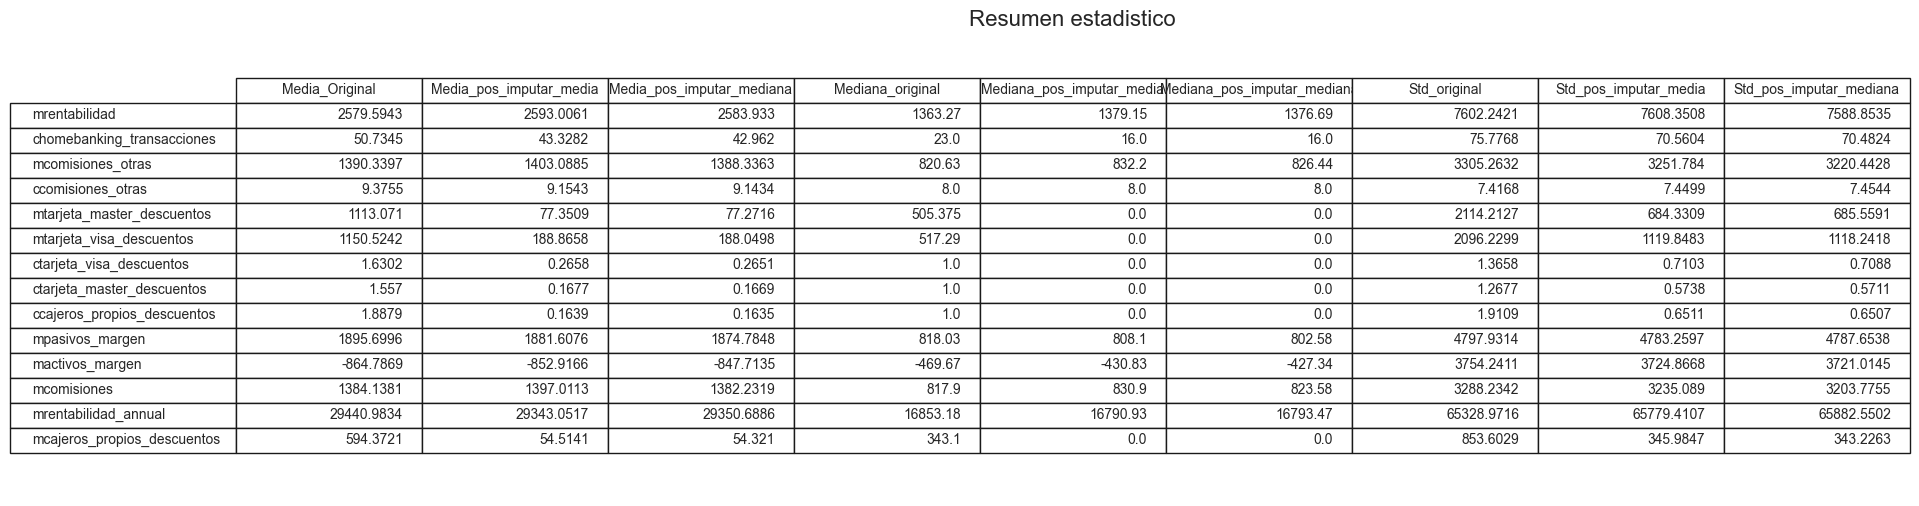

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, tabla_resumen_cliente, loc='center', colWidths=[0.2] * len(tabla_resumen_cliente.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  
plt.title("Resumen estadistico", fontsize=16)

plt.savefig('Resumen estadistico.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [51]:
df_roto_pos_input_media

,numero_de_cliente,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
foto_mes,,,,,,,,,,,,,,,,,,,,,
201906,29183981,1,0,1,48,176,4308.260,57436.420,764.780,-3080.610,...,12.000,40106.950,-43888.380,31.640,5298.000,35725.610,38.000,0.000,1712.580,CONTINUA
201907,29183981,1,0,1,48,177,1888.560,55976.250,982.990,-2460.170,...,7.000,0.000,-40105.960,2.330,5329.000,46622.210,60.000,0.000,2381.190,CONTINUA
201908,29183981,1,0,1,48,178,2053.620,52661.960,1080.120,-2829.770,...,10.000,0.000,-53369.240,2.330,5360.000,39120.510,58.000,0.000,2111.400,CONTINUA
201909,29183981,1,0,1,48,179,986.150,51049.680,2581.040,-3319.710,...,12.000,53585.030,-46725.820,2.330,5390.000,48662.720,55.000,0.000,2322.540,CONTINUA
201910,29183981,1,0,1,48,180,14468.810,161035.990,3163.520,7751.060,...,8.000,0.000,-53547.000,69.130,5421.000,51233.220,81.000,0.000,2897.310,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202107,187454307,1,0,0,33,1,307.110,307.110,353.000,-58.190,...,3.000,0.000,0.000,0.000,19.000,0.000,0.000,0.000,668.610,CONTINUA
202107,187455682,0,0,0,32,1,161.220,161.220,0.000,0.000,...,10.000,0.000,NaN,NaN,11.000,NaN,NaN,NaN,0.000,CONTINUA
202107,187457808,0,0,0,42,1,0.000,0.000,0.000,0.000,...,3.000,0.000,NaN,NaN,16.000,NaN,NaN,NaN,0.000,CONTINUA


In [56]:
df_roto_pos_input_media = dataset_inputado_mediana_cliente.copy()
#df_roto_pos_input_media.set_index('foto_mes', inplace=True)
df_roto_pos_input_media = ((df_roto_pos_input_media == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_pos_input_media = df_roto_pos_input_media.stack().reset_index()
df_roto_pos_input_media.columns = ['foto_mes', 'columna', 'porcentagem_cero_antes']
df_roto_pos_input_media = pd.merge(df_roto_cero, df_roto_pos_input_media, on=['foto_mes', 'columna'], how='left')
df_roto_pos_input_media.columns = ['foto_mes', 'columna', 'porcentagem_cero_antes', 'porcentagem_cero_ahora']
df_roto_pos_input_media.sort_values(by=['porcentagem_cero_ahora'], inplace=True, ascending=False)


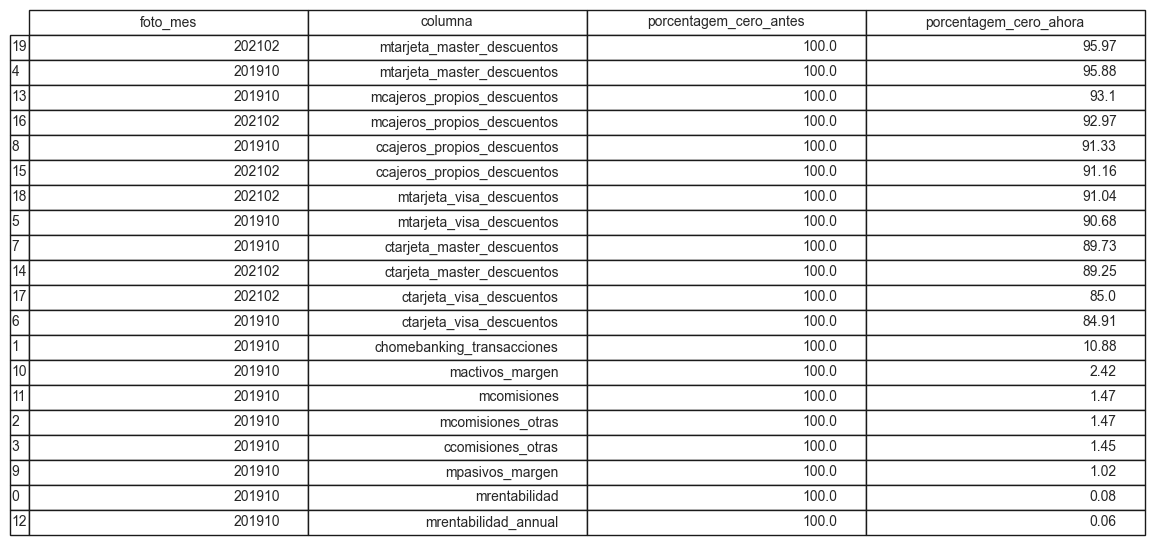

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_roto_pos_input_media, loc='center', colWidths=[0.3] * len(df_roto_pos_input_media.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  

plt.savefig('Resumen estadistico.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [63]:
dataset_inputado_mediana_cliente.reset_index(inplace=True)

In [61]:
dataset_inputado_media_cliente.reset_index(inplace=True)

In [64]:
dataset_inputado_media_cliente.to_csv('./datos/dataset_inputado_media_por_cliente_3_meses.csv.gz', index=False)

In [65]:
dataset_inputado_mediana_cliente.to_csv('./datos/dataset_inputado_mediana_por_cliente_3_meses.csv.gz', index=False)